In [42]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
def create_date_range(start='2018-08-31', end='2024-08-31', freq='M', periods=None):
    """
    Create a DatetimeIndex with enhanced flexibility
    
    Parameters:
    -----------
    start : str, datetime, optional
        Start date of the range (default: '2018-08-31')
    end : str, datetime, optional
        End date of the range (default: '2024-08-31')
    freq : str, optional
        Frequency of the date range (default: 'M' for month end)
        Common frequencies:
        - 'D': calendar day
        - 'B': business day
        - 'W': weekly
        - 'M': month end
        - 'Q': quarter end
        - 'Y': year end
    periods : int, optional
        Number of periods to generate if end is not specified
    
    Returns:
    --------
    pd.DatetimeIndex
        A DatetimeIndex with specified parameters
    """
    try:
        if periods:
            # Use periods and start, don't specify end
            date_range = pd.date_range(start=start, freq=freq, periods=periods)
        else:
            # Use start and end, don't specify periods
            date_range = pd.date_range(start=start, end=end, freq=freq)
        return date_range
    except Exception as e:
        print(f"Error creating date range: {e}")
        return None


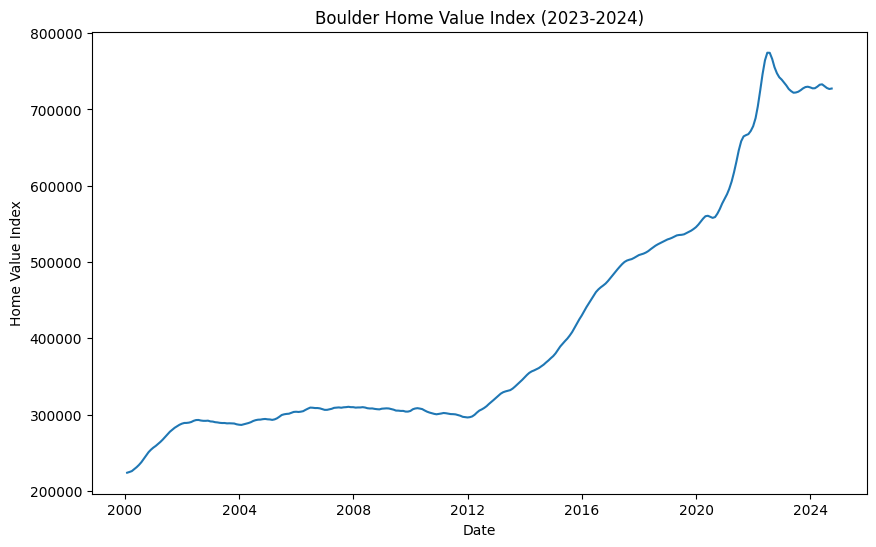

In [44]:
import matplotlib.pyplot as plt

# Visualize the data
plt.figure(figsize=(10,6))
plt.plot(df_boulder['ds'], df_boulder['y'])
plt.title('Boulder Home Value Index (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Home Value Index')
plt.show()


In [45]:
file_path = 'datasets/home_value_index_co.pkl' 
df = pd.read_pickle(file_path)

In [46]:
boulder_data = df[df['RegionName'] == 'Boulder']['home_value_index'].values[0]

# Use the create_date_range function for the time index
date_range = create_date_range(start='2000-01-31', freq='M', periods=len(boulder_data))

# Convert Boulder data into a pandas DataFrame for Prophet
df_boulder = pd.DataFrame({
    'ds': date_range,  # Generated date range
    'y': boulder_data
})

C:\Users\rishe\AppData\Local\Temp\ipykernel_54336\1254570924.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=start, freq=freq, periods=periods)


21:30:31 - cmdstanpy - INFO - Chain [1] start processing
21:30:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\rishe\anaconda3\envs\py311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


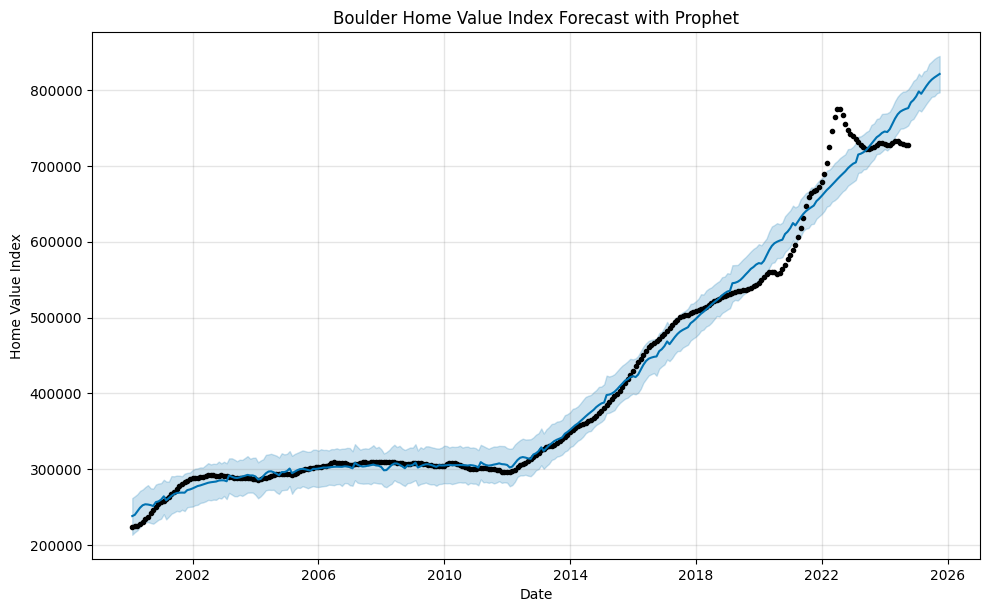

In [47]:
model = Prophet()
model.fit(df_boulder)

# Create a dataframe for future dates (e.g., next 12 months)
future = model.make_future_dataframe(periods=12, freq='M')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Boulder Home Value Index Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Home Value Index')
plt.show()


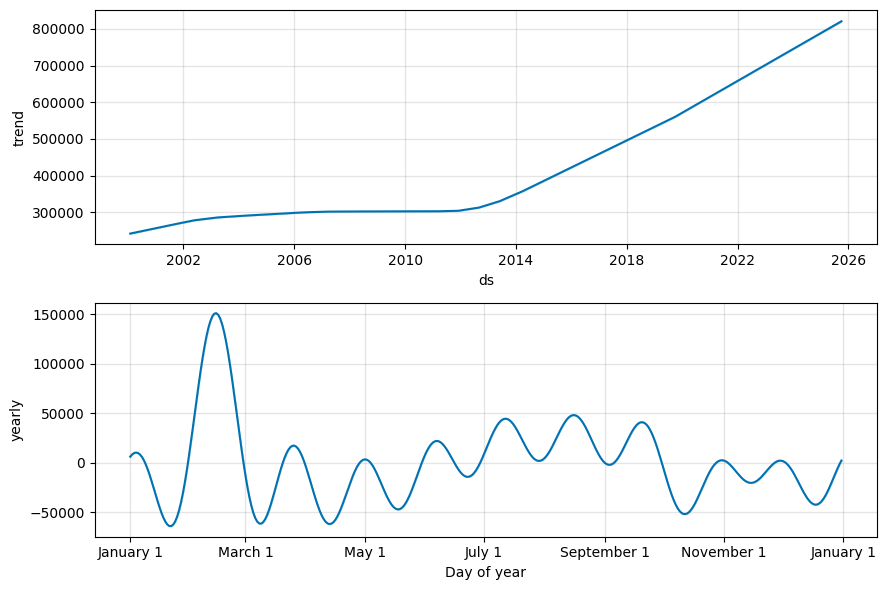

Forecast data (next 12 months):
            ds           yhat     yhat_lower     yhat_upper
297 2024-10-31  783455.447226  759668.153298  805726.522258
298 2024-11-30  786589.167733  761722.817651  811709.099547
299 2024-12-31  791280.363958  767427.772572  814394.069437
300 2025-01-31  797933.481008  773433.097166  821429.751805
301 2025-02-28  794817.375941  771568.044437  817921.324283
302 2025-03-31  800062.970216  776459.831873  824185.651622
303 2025-04-30  805234.555634  781693.820424  825634.167208
304 2025-05-31  809930.391787  786369.728301  834228.268383
305 2025-06-30  813522.001538  790718.904006  837343.814493
306 2025-07-31  816318.515617  791606.049382  840724.950256
307 2025-08-31  818760.179024  795561.466512  843110.043518
308 2025-09-30  820982.657617  796675.058712  844698.315012


In [48]:
fig_components = model.plot_components(forecast)
plt.show()

# Step 11: Print the forecasted data for the next 12 months
print("Forecast data (next 12 months):")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

In [49]:
train_size = int(len(df_boulder) * 0.8)  # 80% training, 20% testing
train_data = df_boulder[:train_size]
test_data = df_boulder[train_size:]


In [50]:
test_data

,ds,y
237,2019-10-31,541159.295220
238,2019-11-30,543272.283492
239,2019-12-31,545731.453228
240,2020-01-31,549116.095908
241,2020-02-29,552933.955038
242,2020-03-31,556901.697971
243,2020-04-30,560050.351244
244,2020-05-31,560627.144724
245,2020-06-30,559354.406394
246,2020-07-31,557884.908302


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compare the predicted values with actual values from the test set
y_true = test_data['y'].values
y_pred = forecast['yhat'][-len(test_data):].values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 52551.87926650545
MSE: 3432473569.822318
RMSE: 58587.31577587693


c:\Users\rishe\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


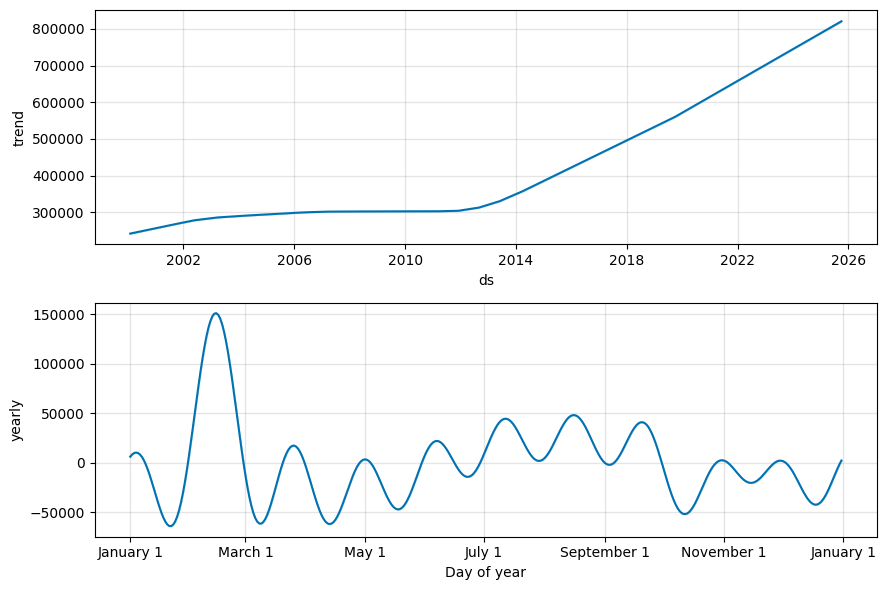

Forecast data (last few rows):
            ds           yhat     yhat_lower     yhat_upper
297 2024-10-31  783455.447226  759668.153298  805726.522258
298 2024-11-30  786589.167733  761722.817651  811709.099547
299 2024-12-31  791280.363958  767427.772572  814394.069437
300 2025-01-31  797933.481008  773433.097166  821429.751805
301 2025-02-28  794817.375941  771568.044437  817921.324283
302 2025-03-31  800062.970216  776459.831873  824185.651622
303 2025-04-30  805234.555634  781693.820424  825634.167208
304 2025-05-31  809930.391787  786369.728301  834228.268383
305 2025-06-30  813522.001538  790718.904006  837343.814493
306 2025-07-31  816318.515617  791606.049382  840724.950256
307 2025-08-31  818760.179024  795561.466512  843110.043518
308 2025-09-30  820982.657617  796675.058712  844698.315012


In [52]:
ig_components = model.plot_components(forecast)
plt.show()

# Print the forecast data
print("Forecast data (last few rows):")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

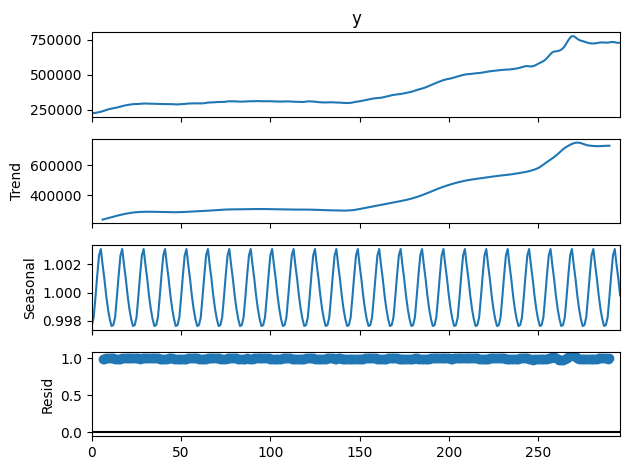

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series to see trend, seasonality, and residuals
decomposition = seasonal_decompose(df_boulder['y'], model='multiplicative', period=12)
decomposition.plot()
plt.show()


C:\Users\rishe\AppData\Local\Temp\ipykernel_54336\254114032.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=start, freq=freq, periods=periods)
21:30:32 - cmdstanpy - INFO - Chain [1] start processing
21:30:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\rishe\anaconda3\envs\py311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


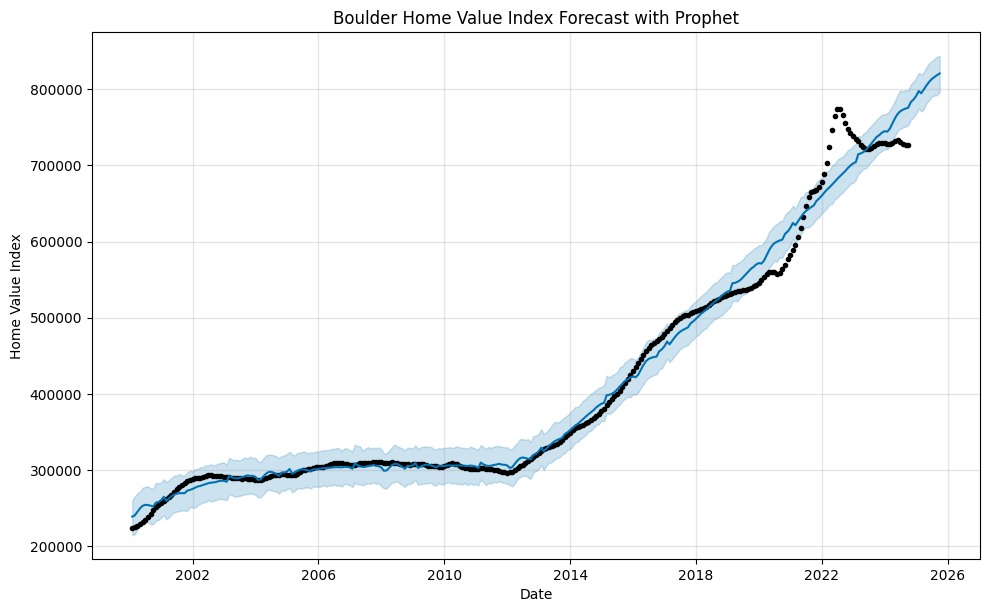

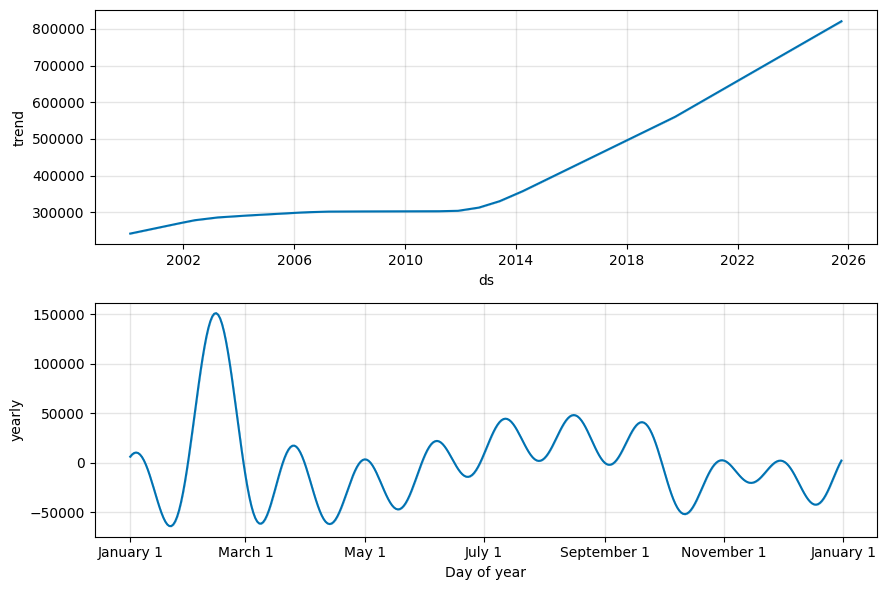

Forecast data (next 12 months):
            ds           yhat     yhat_lower     yhat_upper
297 2024-10-31  783455.447226  760180.942777  806652.999079
298 2024-11-30  786589.167733  762988.224734  810091.503686
299 2024-12-31  791280.363958  768277.037560  815202.960229
300 2025-01-31  797933.481008  774735.813577  821714.453907
301 2025-02-28  794817.375941  771057.501714  819285.668744
302 2025-03-31  800062.970216  774149.994032  822742.891090
303 2025-04-30  805234.555634  781902.670853  828993.868382
304 2025-05-31  809930.391787  786064.597853  834732.584550
305 2025-06-30  813522.001538  790360.954222  837303.623408
306 2025-07-31  816318.515617  791983.202326  840152.313932
307 2025-08-31  818760.179024  792491.913170  843212.316374
308 2025-09-30  820982.657617  796374.940981  844008.421742

Accuracy Metrics:
MAPE: 2.471681378546841
MAE: 11587.199200436607
RMSE: 18500.690182222334


In [54]:
from prophet import Prophet 
import pandas as pd 
import matplotlib.pyplot as plt

def create_date_range(start='2018-08-31', end='2024-08-31', freq='M', periods=None):
    """ 
    Create a DatetimeIndex with enhanced flexibility 
     
    Parameters: 
    ----------- 
    start : str, datetime, optional 
        Start date of the range (default: '2018-08-31') 
    end : str, datetime, optional 
        End date of the range (default: '2024-08-31') 
    freq : str, optional 
        Frequency of the date range (default: 'M' for month end) 
        Common frequencies: 
        - 'D': calendar day 
        - 'B': business day 
        - 'W': weekly 
        - 'M': month end 
        - 'Q': quarter end 
        - 'Y': year end 
    periods : int, optional 
        Number of periods to generate if end is not specified 
     
    Returns: 
    -------- 
    pd.DatetimeIndex 
        A DatetimeIndex with specified parameters 
    """ 
    try: 
        if periods: 
            # Use periods and start, don't specify end 
            date_range = pd.date_range(start=start, freq=freq, periods=periods) 
        else: 
            # Use start and end, don't specify periods 
            date_range = pd.date_range(start=start, end=end, freq=freq) 
        return date_range 
    except Exception as e: 
        print(f"Error creating date range: {e}") 
        return None

def forecast_home_values(file_path='datasets/home_value_index_co.pkl', region='Boulder'):
    # Read the pickle file
    df = pd.read_pickle(file_path)
    
    # Filter data for the specific region
    boulder_data = df[df['RegionName'] == region]['home_value_index'].values[0]
    
    # Create date range for historical data
    date_range = create_date_range(start='2000-01-31', freq='M', periods=len(boulder_data))
    
    # Convert Boulder data into a pandas DataFrame for Prophet
    df_boulder = pd.DataFrame({
        'ds': date_range,  # Generated date range
        'y': boulder_data 
    })
    
   
   
    # Initialize and fit Prophet model
    model = Prophet()
    model.fit(df_boulder)
    
    # Create a dataframe for future dates (next 12 months)
    future = model.make_future_dataframe(periods=12, freq='M')
    
    # Make predictions
    forecast = model.predict(future)
    
    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f'{region} Home Value Index Forecast with Prophet')
    plt.xlabel('Date')
    plt.ylabel('Home Value Index')
    plt.show()
    
    # Plot model components
    fig_components = model.plot_components(forecast)
    plt.show()
    
    # Print the forecasted data for the next 12 months
    print("Forecast data (next 12 months):")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))
    
    # Calculate accuracy metrics
    def calculate_accuracy(original, forecast):
        # Last len(original) rows of the forecast are the original data
        historical_forecast = forecast.iloc[:len(original)]
        
        # Mean Absolute Percentage Error (MAPE)
        mape = abs((original - historical_forecast['yhat']) / original).mean() * 100
        
        # Mean Absolute Error (MAE)
        mae = abs(original - historical_forecast['yhat']).mean()
        
        # Root Mean Squared Error (RMSE)
        rmse = ((original - historical_forecast['yhat'])**2).mean()**0.5
        
        return {
            'MAPE': mape,
            'MAE': mae,
            'RMSE': rmse
        }
    
    accuracy_metrics = calculate_accuracy(df_boulder['y'], forecast)
    print("\nAccuracy Metrics:")
    for metric, value in accuracy_metrics.items():
        print(f"{metric}: {value}")
    
    return model, forecast, accuracy_metrics

# Example usage
model, forecast, accuracy = forecast_home_values()